In [2]:
from PIL import Image
from torchvision import models
import torch
from torchvision import transforms


In [3]:
img = Image.open("persian.jpg")
img.show()
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])
imgt = transform(img)

In [3]:
alexnet = models.resnet50(pretrained=True)
print(imgt.shape)

torch.Size([3, 224, 224])


In [4]:
batch_t = torch.unsqueeze(imgt, 0)
print(batch_t.shape)

torch.Size([1, 3, 224, 224])


In [5]:
out = alexnet(batch_t)
print(out.shape)


torch.Size([1, 1000])


In [7]:
print(torch.argmax(out))

tensor(463)


In [4]:
# load models
use_cuda = torch.cuda.is_available()  
def loadAlex():
    model = models.alexnet(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

def loadResnet():
    model = models.resnet50(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
def normalize_transform():
    return transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
def inverse_normalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor
    
val_transforms = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(),normalize_transform()])    
#val_dataset = torchvision.datasets.ImageFolder('/home/mallet/Downloads/val/',transform = val_transforms)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=500, num_workers=4)
model = loadAlex()
'''
batch = next(iter(val_loader))
images, labels = batch

with torch.no_grad():
    output = alexnet(images)


for i in output:
    out_soft = torch.nn.functional.softmax(i, dim=0)
    print(int(torch.argmax(out_soft)))
'''

In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [191]:
images, labels = val_dataset[1994]
val_dataset[1994]
print(val_dataset.class_to_idx)

{'n01440764': 0, 'n01443537': 1, 'n01484850': 2, 'n01491361': 3, 'n01494475': 4, 'n01496331': 5, 'n01498041': 6, 'n01514668': 7, 'n01514859': 8, 'n01518878': 9, 'n01530575': 10, 'n01531178': 11, 'n01532829': 12, 'n01534433': 13, 'n01537544': 14, 'n01558993': 15, 'n01560419': 16, 'n01580077': 17, 'n01582220': 18, 'n01592084': 19, 'n01601694': 20, 'n01608432': 21, 'n01614925': 22, 'n01616318': 23, 'n01622779': 24, 'n01629819': 25, 'n01630670': 26, 'n01631663': 27, 'n01632458': 28, 'n01632777': 29, 'n01641577': 30, 'n01644373': 31, 'n01644900': 32, 'n01664065': 33, 'n01665541': 34, 'n01667114': 35, 'n01667778': 36, 'n01669191': 37, 'n01675722': 38, 'n01677366': 39, 'n01682714': 40, 'n01685808': 41, 'n01687978': 42, 'n01688243': 43, 'n01689811': 44, 'n01692333': 45, 'n01693334': 46, 'n01694178': 47, 'n01695060': 48, 'n01697457': 49, 'n01698640': 50, 'n01704323': 51, 'n01728572': 52, 'n01728920': 53, 'n01729322': 54, 'n01729977': 55, 'n01734418': 56, 'n01735189': 57, 'n01737021': 58, 'n0173

In [192]:
labels

997

In [193]:
images.shape

torch.Size([3, 400, 267])

In [194]:
batch_t = torch.squeeze(images, 0)
inv_tensor = inverse_normalize(batch_t, mean, std)

In [195]:
batch_t.shape

torch.Size([3, 400, 267])

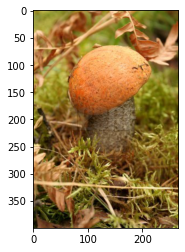

In [196]:
plt.imshow(batch_t.permute(1, 2, 0)  )

In [62]:
print(batch_t)

tensor([[[-1.7925, -1.7925, -1.7583,  ..., -0.3027, -0.3369, -0.3369],
         [-1.8097, -1.8097, -1.7754,  ..., -0.3369, -0.3712, -0.3541],
         [-1.8268, -1.8097, -1.7754,  ..., -0.3712, -0.3712, -0.4226],
         ...,
         [ 0.3823,  0.5193,  0.6392,  ..., -0.1143,  0.0398,  0.0741],
         [ 1.1015,  1.1015,  0.7933,  ..., -0.0801, -0.1486, -0.0972],
         [ 0.1083,  0.1254,  0.0569,  ..., -0.0116,  0.0741,  0.1254]],

        [[-1.6856, -1.6856, -1.6506,  ..., -0.3200, -0.3025, -0.2675],
         [-1.7031, -1.7031, -1.6681,  ..., -0.2850, -0.3025, -0.2325],
         [-1.7031, -1.6856, -1.6681,  ..., -0.2500, -0.2500, -0.2675],
         ...,
         [ 0.4853,  0.6429,  0.7829,  ..., -0.0049,  0.1527,  0.1877],
         [ 1.2206,  1.2206,  0.9405,  ...,  0.0651, -0.0049,  0.0476],
         [ 0.1877,  0.2052,  0.1702,  ...,  0.1352,  0.2227,  0.2752]],

        [[-1.3861, -1.3861, -1.3513,  ..., -0.1487, -0.1487, -0.1312],
         [-1.4384, -1.4384, -1.3687,  ..., -0

In [172]:
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batchsize, num_workers=workers)


'055'

In [18]:
from torchray.attribution.grad_cam import grad_cam
from torchray.benchmark import get_example_data, plot_example

torch.Size([1, 1, 13, 13])


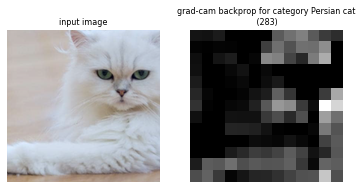

In [89]:
from torchray.attribution.grad_cam import grad_cam
from torchray.benchmark import get_example_data, plot_example
from torchray.attribution.gradient import gradient

# Obtain example data.
img = Image.open("persian.jpg")
transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225]),
    ])

x = transform(img).unsqueeze(0)
x = x.cuda()
'''
saliency = gradient(model, x, 283)
print(saliency.shape)
print(saliency)
# Plots.
plot_example(x, saliency, 'gradient', 283)
'''
ff = loadAlex()
# Grad-CAM backprop.
saliency = grad_cam(ff, x, 283, saliency_layer='features.9')
print(saliency.shape)
# Plots.
plot_example(x, saliency, 'grad-cam backprop', 283)


In [25]:
from torchray.attribution.extremal_perturbation import extremal_perturbation, contrastive_reward
from torchray.benchmark import get_example_data, plot_example
from torchray.utils import get_device

extremal_perturbation:
- target: 283
- areas: [0.12]
- variant: preserve
- max_iter: 800
- step/sigma: 7, 21
- image size: [1, 3, 224, 224]
- reward function: contrastive_reward
- Perturbation:
  - type: blur
  - num_levels: 8
  - pyramid shape: [8, 3, 224, 224]
- mask resolution:
  torch.Size([1, 1, 32, 32])
[0001/0800] [area:0.12 loss:4.13 reg:-242.37]


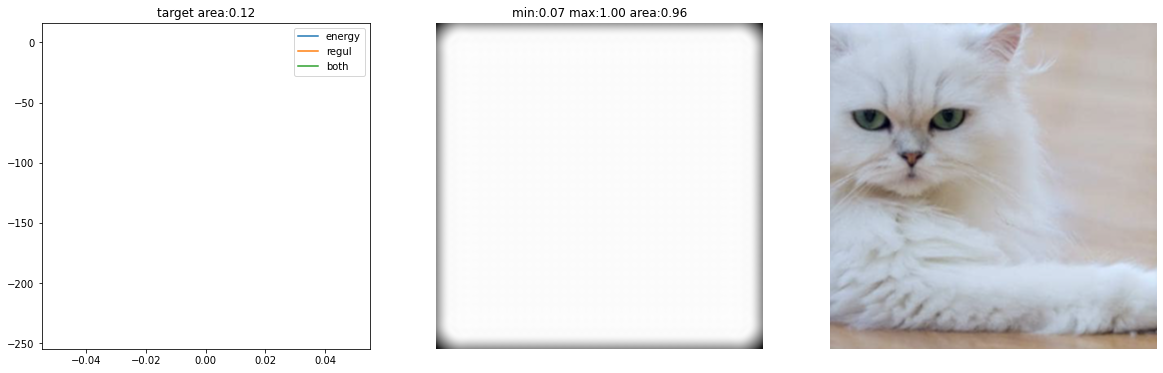

[0200/0800] [area:0.12 loss:5.96 reg:-25.31]


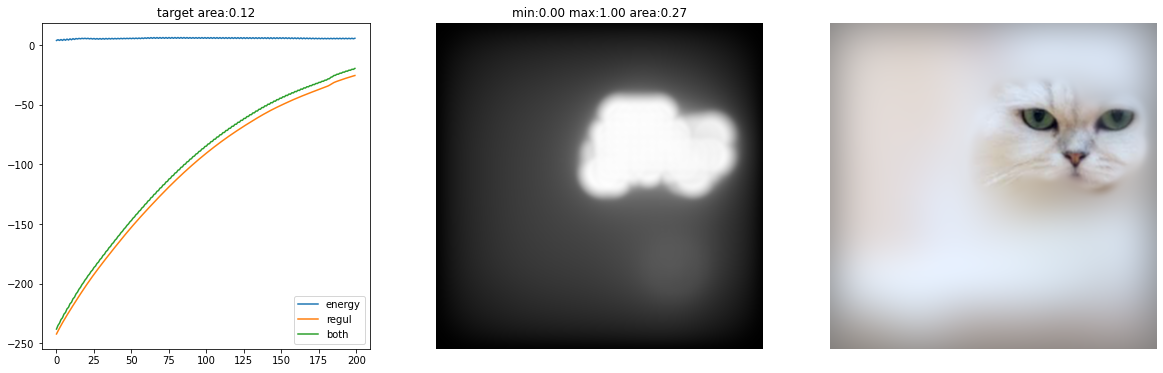

[0399/0800] [area:0.12 loss:5.57 reg:-11.66]


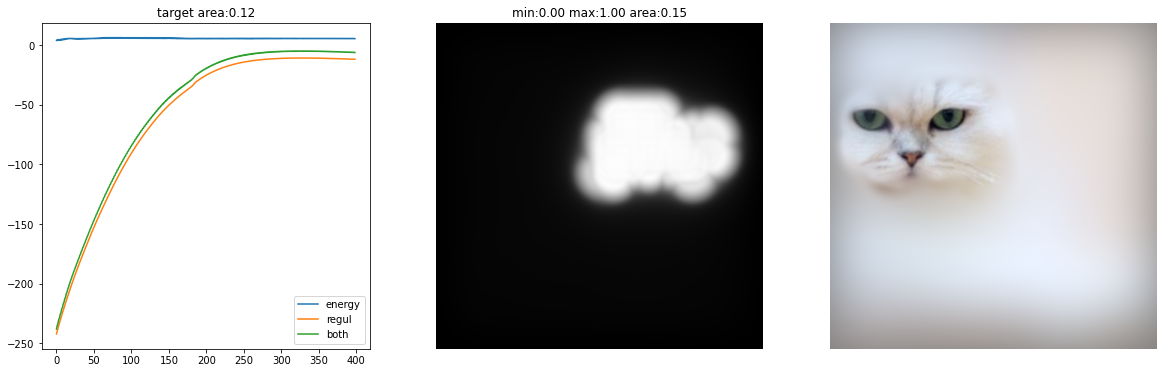

[0598/0800] [area:0.12 loss:5.85 reg:-20.07]


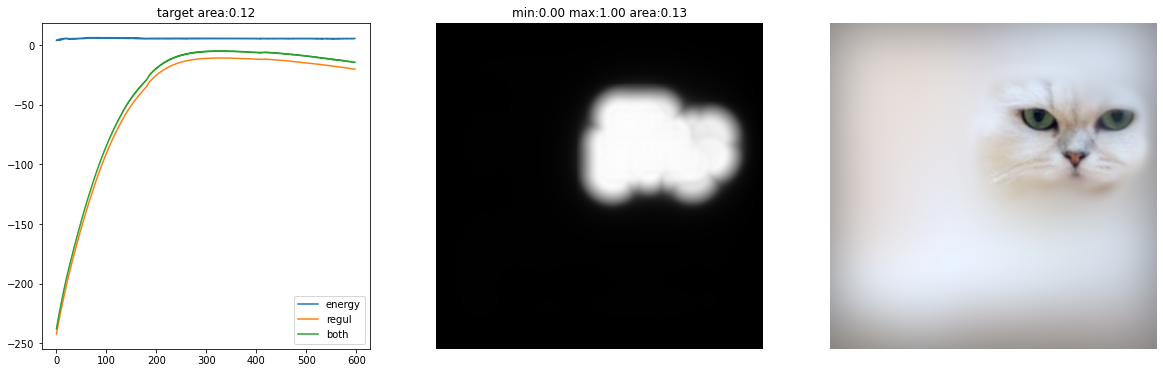

[0797/0800] [area:0.12 loss:5.53 reg:-39.99]


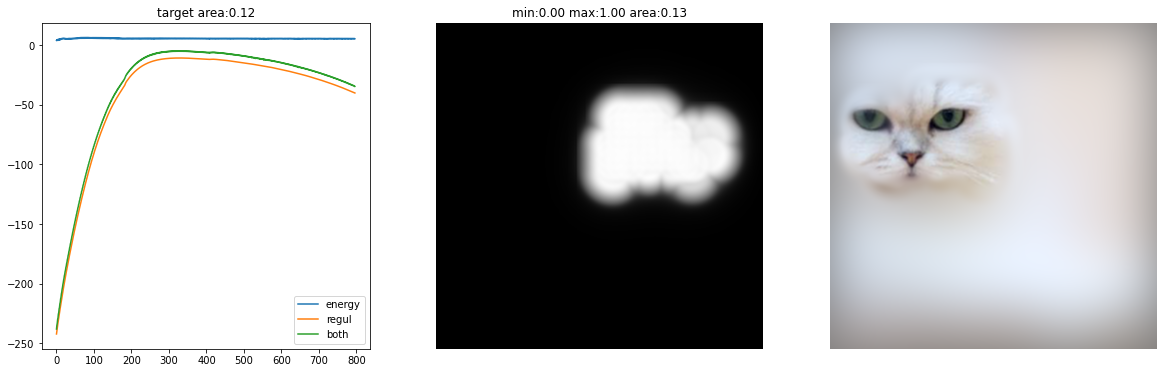

[0800/0800] [area:0.12 loss:5.79 reg:-40.38]


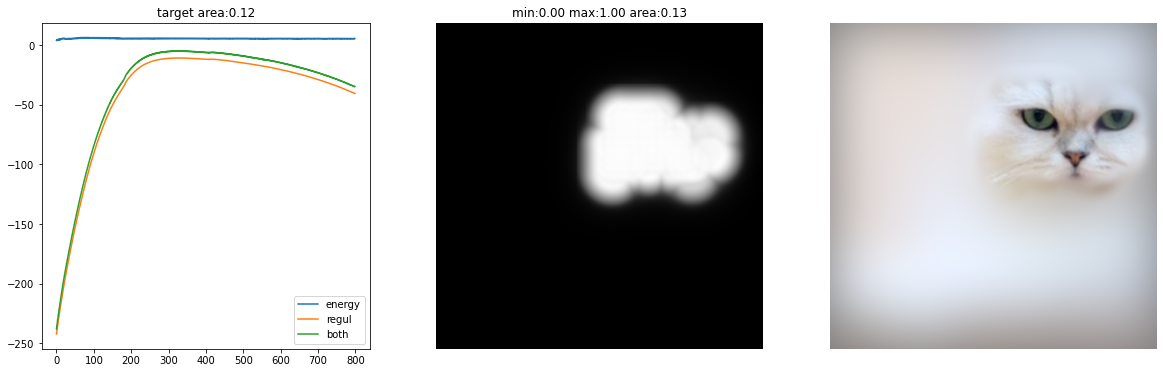

torch.Size([1, 1, 224, 224])


In [90]:
masks_1, _ = extremal_perturbation(
    model, x, 283,
    reward_func=contrastive_reward,
    debug=True,
    areas=[0.12],
)
print(masks_1.shape)

In [28]:
print(masks_1)

tensor([[[[0.0006, 0.0007, 0.0007,  ..., 0.0001, 0.0001, 0.0001],
          [0.0007, 0.0007, 0.0007,  ..., 0.0002, 0.0002, 0.0001],
          [0.0007, 0.0007, 0.0007,  ..., 0.0002, 0.0002, 0.0002],
          ...,
          [0.0008, 0.0009, 0.0009,  ..., 0.0004, 0.0004, 0.0004],
          [0.0008, 0.0008, 0.0008,  ..., 0.0004, 0.0004, 0.0004],
          [0.0008, 0.0008, 0.0008,  ..., 0.0004, 0.0004, 0.0004]]]],
       device='cuda:0')


In [197]:
modelss = models.alexnet(pretrained=True)
print(modelss)
print(modelss.features[-1])

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [195]:
modelss = models.resnet50(pretrained=True)
print(modelss)
print(modelss.layer4[-1])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [84]:
modelss.features[-1]

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [65]:
:class:`torch.nn.Module`

SyntaxError: invalid syntax (<ipython-input-65-1f1270b1b44d>, line 1)

In [93]:
import torchray
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Downloads/val/',transform = val_transforms)

In [94]:
print(vall)

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: /home/mallet/Downloads/val/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [106]:
print(vall.full_classes)

None


In [98]:
vall[1]

(tensor([[[-1.7583, -1.6898, -1.6384,  ..., -1.7069, -1.6727, -1.7240],
          [-1.7754, -1.7583, -1.5870,  ..., -1.6384, -1.7412, -1.7583],
          [-1.9124, -1.8782, -1.5870,  ..., -1.4329, -1.4158, -1.4672],
          ...,
          [-0.1486, -0.2342, -0.2342,  ..., -1.4158, -1.3473, -1.1932],
          [-0.1999, -0.2684, -0.3027,  ..., -1.6384, -1.5699, -1.5185],
          [-0.3027, -0.3198, -0.3027,  ..., -1.6042, -1.6384, -1.6384]],
 
         [[-1.4055, -1.4230, -1.4755,  ..., -1.2304, -1.2129, -1.2129],
          [-1.4755, -1.5280, -1.4405,  ..., -1.4230, -1.5280, -1.5805],
          [-1.7381, -1.7731, -1.5630,  ..., -1.2129, -1.2129, -1.3004],
          ...,
          [ 0.0301, -0.0224, -0.0399,  ..., -1.2479, -1.0903, -0.9328],
          [-0.0749, -0.0924, -0.1275,  ..., -1.2829, -1.2829, -1.2654],
          [-0.1800, -0.1625, -0.1275,  ..., -1.3004, -1.3704, -1.3704]],
 
         [[-0.7936, -0.8981, -1.0898,  ..., -1.3164, -1.2641, -1.2816],
          [-1.0201, -1.1073,

In [224]:
img = Image.open("persian.jpg")
img.show()
print(img.size)
transform = transforms.Compose([            #[1]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])
imgt = transform(img)
x = transform(img).unsqueeze(0)
x = x.cuda()
print(imgt.shape)
print(x.shape)

(640, 464)
torch.Size([3, 464, 640])
torch.Size([1, 3, 464, 640])


torch.Size([1, 1, 224, 224])
tensor([[[[0.0043, 0.0058, 0.0052,  ..., 0.0021, 0.0016, 0.0020],
          [0.0035, 0.0013, 0.0026,  ..., 0.0028, 0.0016, 0.0011],
          [0.0034, 0.0033, 0.0104,  ..., 0.0032, 0.0025, 0.0008],
          ...,
          [0.0014, 0.0024, 0.0018,  ..., 0.0013, 0.0011, 0.0017],
          [0.0015, 0.0022, 0.0022,  ..., 0.0001, 0.0013, 0.0019],
          [0.0010, 0.0027, 0.0028,  ..., 0.0010, 0.0015, 0.0014]]]],
       device='cuda:0')
tensor(0.1812, device='cuda:0')


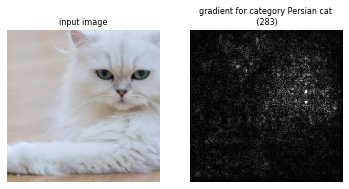

In [113]:
saliency = gradient(loadAlex(), x, 283)
print(saliency.shape)
print(saliency)
print(torch.max(saliency))
plot_example(x, saliency, 'gradient', 283)

In [15]:
import torchray
import numpy as np
import xml.etree.ElementTree as ET
import cv2
import time
import torchray.benchmark
from torchray.attribution.gradient import gradient
import torchray.benchmark.pointing_game

val_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),normalize_transform()])    
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',transform = val_transforms)
pgtot=0
tm = 0
ttotal = 0
use_cuda = torch.cuda.is_available()  
model = models.resnet50(pretrained=True)
model = model.eval()
if use_cuda:
    model.cuda()
    
for i in range(2000):
    
    img, labele = vall[i]
    x = img.unsqueeze(0)
    x = x.cuda()
    start = time.time()
    saliency = gradient(model, x, labele)
    end = time.time()
    tm = end - start
    ttotal = ttotal + tm
    saliency = saliency.squeeze(0)
    saliency = saliency.cpu().detach().numpy()
    saliency = saliency.squeeze(0)
    xloc,yloc = np.unravel_index(saliency.argmax(), saliency.shape)
    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]
    tree = ET.parse('/home/mallet/Desktop/VanillaVsARobust/bb/'+ bbname + '.xml')
    root = tree.getroot()
    salresized = cv2.resize(saliency, (int(root[3][0].text), (int(root[3][1].text))))
    xmin = int(root[5][4][0].text)
    ymin = int(root[5][4][1].text)
    xmax = int(root[5][4][2].text)
    ymax = int(root[5][4][3].text)
    Y = torch.zeros((int(root[3][1].text), int(root[3][0].text)), dtype=torch.bool)
    Y[ymin:ymax, xmin:xmax]=True
    test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=15)
    pg = test.evaluate(Y, (xloc,yloc))
    if pg==1:
        pgtot+=1
        
print(pgtot/2000)
print(ttotal)
'''
plt.imshow(Y)
plt.show()
print(Y)
print(xxm,hhm, xxmx,hhmn)
#Y = np.zeros((rows, cols))
yy = torch.from_numpy(Y)
print(yy.shape)
yy[xmin:xmax, ymin:ymax]=True
type(yy)'''

0.4745
45.77086925506592


'\nplt.imshow(Y)\nplt.show()\nprint(Y)\nprint(xxm,hhm, xxmx,hhmn)\n#Y = np.zeros((rows, cols))\nyy = torch.from_numpy(Y)\nprint(yy.shape)\nyy[xmin:xmax, ymin:ymax]=True\ntype(yy)'

In [285]:
print(pgtot/2000)

0.475


In [185]:
# removing 48000 of BB which are not in our samples
'''
import os
import glob
ls = []
for i in range(2000):
    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]
    nameva = bbname + '.xml'
    ls.append(nameva)
bbfiles = glob.glob('bb/*.xml')
print(bbfiles)
for j in bbfiles:
    j.split("/")[-1]
    zz = 0
for l in range(50000):
    if ls.count(bbfiles[l].split("/")[-1])==0:
        os.remove('/home/mallet/Desktop/VanillaVsARobust/'+bbfiles[l])
        
print(zz)
'''

0
